## Подготовка данных

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

### Загрузка данных

Загрузим обучающую выборку.

In [2]:
df_train = pd.read_csv('gold_recovery_train_new.csv')

Взглянем на первые 5 строк.

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Загрузим тестовую выборку.

In [5]:
df_test = pd.read_csv('gold_recovery_test_new.csv')

Взглянем на первые пять строк.

In [6]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Загрузим исходные данные.

In [8]:
df = pd.read_csv('gold_recovery_full_new.csv')

Посмотрим на первые 5 строк.

In [9]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
date = df_test['date']
date

0       2016-09-01 00:59:59
1       2016-09-01 01:59:59
2       2016-09-01 02:59:59
3       2016-09-01 03:59:59
4       2016-09-01 04:59:59
               ...         
5285    2017-12-31 19:59:59
5286    2017-12-31 20:59:59
5287    2017-12-31 21:59:59
5288    2017-12-31 22:59:59
5289    2017-12-31 23:59:59
Name: date, Length: 5290, dtype: object

**Вывод:**
1. В обучающей выборке содержится 14149 строк и 87 столбцов. Во многих столбцах имеются пропущенные значения, однако их число невелико. Столбец с наибольшим числом пропусков - *secondary_cleaner.output.tail_sol*.
2. В тестовой выборке содержится 5290 строк и 53 столбца. Как и в обучающей выборке, здесь имеются пропуски в столбцах, однако их число не превышает 25 в столбце.
3. Исходные данные представляют собой объединение обучающей и тестовой выборок. В них 19439 строк и 87 столбцов. Как и в предыдущих случаях имеются пропуски.
4. Целевые признаки *rougher.output.recovery* и *final.output.recovery* не имеют пропусков.

### Проверка расчета эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Для этого рассчитаем эффективность обогащения для этапа флотации и сравним ее с имеющимся в выбокре признаком.

Для начала напишем функцию, рассчитывающую эффективность обогащения.

In [12]:
def recovery_calculation(row):
    '''
    Данная функция рассчитывает эффективность обогащения.
    '''
    c = row['rougher.output.concentrate_au']    # доля золота в концентрате после флотации
    f = row['rougher.input.feed_au']            # доля золота в сырье до флотации
    t = row['rougher.output.tail_au']           # доля золота в отвальных хвостах после флотации
    recovery = (c * (f-t)) / (f * (c-t)) * 100
    return recovery

Рассчитаем эффективность обогащения флотации, применив функцию к обучающей выборке.

In [13]:
df_train['recovery_calculated'] = df_train.apply(recovery_calculation, axis=1)

Взглянем на полученные результаты. Выведем имеющийся столбец и рассчитанные для него значения.

In [14]:
df_train[['rougher.output.recovery', 'recovery_calculated']]

,rougher.output.recovery,recovery_calculated
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


Определим среднюю абсолютную ошибку между имеющимися и вычисленными значениями.

In [15]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['recovery_calculated'])

9.73512347450521e-15

Ошибка является ничтожно малым числом. Для проверки взглянем на строки, где рассчитаное и имеющееся значения не равны друг другу.

In [16]:
df_train[df_train['rougher.output.recovery'] != df_train['recovery_calculated']][['rougher.output.recovery', 'recovery_calculated']]

,rougher.output.recovery,recovery_calculated
1,86.843261,86.843261
2,86.842308,86.842308
5,88.156912,88.156912
6,88.168065,88.168065
8,87.035862,87.035862
...,...,...
14138,91.675070,91.675070
14140,89.946627,89.946627
14143,91.816623,91.816623
14146,88.890579,88.890579


Как мы видим значения равны вплоть до 6 знака после запятой, а отличие метрики от нуля (хоть и ничтожно малое) объясняется спецификой записи вещественных чисел в python.

Удалим столбец с рассчитанным обогащением за ненадобностью.

In [17]:
df_train = df_train.drop('recovery_calculated', axis=1)

**Вывод:**
1. Эффективность обогащения рассчитана корректно.

### Анализ признаков, недоступных в тестовой выборке

Проанализируем признаки, которые не попали в тестовую выборку.
Определим, какие признаки не попали в нее.

In [18]:
missed_features = []

for col in df_train.columns:
    if col not in df_test.columns:
        missed_features.append(col)
        
missed_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса.

### Предобработка данных.

#### Подготовка признаков

##### Тестовая выборка

Создадим переменную, содержащую целевые признаки для тестовой выборки. Значения возьмем из набора исходных данных, выбрав строки, у которых дата совпадает с датой в тестовом наборе.

In [43]:
test_date = df_test['date']
target_test = df.query('date in @test_date')[['date', 'rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

In [44]:
print(target_test.shape)
target_test.head()

(5290, 3)


,date,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,89.993421,70.273583
1,2016-09-01 01:59:59,88.089657,68.910432
2,2016-09-01 02:59:59,88.412756,68.143213
3,2016-09-01 03:59:59,87.360133,67.776393
4,2016-09-01 04:59:59,83.236367,61.467078


Проверим, совпадают ли даты в новой переменной и в тестовом наборе построчно.

In [45]:
(df_test['date'] != target_test['date']).mean()

0.0

Выделение целевого признака произведено успешно. Столбец даты можно удалять.

In [46]:
target_test = target_test.drop('date', axis=1)

Создадим матрицу признаков для тестовой выборки.

In [47]:
features_test = df_test.drop('date', axis=1)

In [48]:
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Еще раз проверим получившиеся переменные.

In [49]:
print(target_test.shape)
features_test.shape

(5290, 2)


(5290, 52)

##### Обучающая выборка

Создадим переменную, содержащую оба целевых признака.

In [50]:
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

In [51]:
print(target_train.shape)
target_train.head()

(14149, 2)


,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


Для формирования матрицы признаков необходимо из обучающей выборки удалить все столбцы, непредставленные в тестовой выборке, иначе мы не сможем делать предсказания по тестовой выборке.

In [52]:
features_train = df_train[features_test.columns]

In [53]:
print(features_train.shape)
features_train.head()

(14149, 52)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


#### Поиск дубликатов

Проверим данные на дубликаты.

In [30]:
df.duplicated().sum()

0

Дубликатов не обнаружено.

#### Заполнение пропусков

Посмотрим на относительное количество пропусков в обучающей и тестовой выборке.

In [54]:
(features_train.isna().sum() / len(features_train)).sort_values(ascending=False)

rougher.state.floatbank10_e_air               0.030815
rougher.input.floatbank11_xanthate            0.030249
secondary_cleaner.state.floatbank2_a_air      0.015337
rougher.input.feed_size                       0.010177
rougher.input.feed_pb                         0.007068
primary_cleaner.input.xanthate                0.007068
rougher.input.feed_sol                        0.005513
rougher.input.floatbank11_sulfate             0.002544
primary_cleaner.input.depressant              0.002262
rougher.input.floatbank10_sulfate             0.002050
secondary_cleaner.state.floatbank2_b_air      0.001484
primary_cleaner.input.sulfate                 0.001414
rougher.input.feed_rate                       0.000565
rougher.input.floatbank10_xanthate            0.000565
secondary_cleaner.state.floatbank4_a_air      0.000424
primary_cleaner.state.floatbank8_a_air        0.000283
primary_cleaner.state.floatbank8_b_air        0.000283
secondary_cleaner.state.floatbank3_a_air      0.000283
primary_cl

In [55]:
(features_test.isna().sum() / len(features_test)).sort_values(ascending=False)

rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.xanthate                0.000756
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_a_air      0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank6_a_air      0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_

Наибольшее количество пропусков в двух столбцах обучающей выборки - около 3%. В остальных столбцах пропусков меньше. В тестовой выборке количество пропусков во всех столбцах не превышает 0.5%. 

С одной стороны, пропусков немного, и их можно удалить, однако для получения модели хорошего качества желательно иметь как можно больше данных. Поэтому пропуски нужно как-то заполнить. Рассмотрим несколько способов заполнения и сравним их эффективность на простой модели.

##### Заполнение нулями

Сначала попробуем простейшее заполнение нулями. Качество будем измерять с помощью MAE.

In [56]:
imp_zeros = SimpleImputer(strategy='constant', fill_value=0)
features_zeros = imp_zeros.fit_transform(features_train)
model = LinearRegression()
y_pred = cross_val_predict(model, features_zeros, target_train, cv=5)
mean_absolute_error(target_train, y_pred)

8.740912378559186

##### Заполнение медианой

In [57]:
imp_medians = SimpleImputer(strategy='median')
features_medians = imp_medians.fit_transform(features_train)
model = LinearRegression()
y_pred = cross_val_predict(model, features_medians, target_train, cv=5)
mean_absolute_error(target_train, y_pred)

8.20932501995007

##### Заполнение средним

In [58]:
imp_means = SimpleImputer(strategy='mean')
features_means = imp_means.fit_transform(features_train)
model = LinearRegression()
y_pred = cross_val_predict(model, features_means, target_train, cv=5)
mean_absolute_error(target_train, y_pred)

8.212180967467857

##### Заполнение с помощью метода К-ближайших соседей

In [59]:
imp_knn = KNNImputer()
features_knn = imp_knn.fit_transform(features_train)
features_knn = imp_knn.transform(features_train)
model = LinearRegression()
y_pred = cross_val_predict(model, features_knn, target_train, cv=5)
mean_absolute_error(target_train, y_pred)

8.216701051050222

##### Заполнение с помощью итеративного импьютера

In [60]:
imp_iter = IterativeImputer(max_iter=1000, random_state=42)
features_iter = imp_iter.fit_transform(features_train)
model = LinearRegression()
y_pred = cross_val_predict(model, features_iter, target_train, cv=5)
mean_absolute_error(target_train, y_pred)

8.18193457058452

Наиболее эффективным оказалось заполнение с помощью итеративного импьютера, им и заполним пропуски.

In [61]:
imputer = IterativeImputer(max_iter=1000, random_state=42)
features_train = pd.DataFrame(imputer.fit_transform(features_train), columns=features_train.columns)
features_test = pd.DataFrame(imputer.transform(features_test), columns=features_test.columns)

Выполняем проверку.

In [62]:
print(features_train.isna().sum().sum())
print(features_test.isna().sum().sum())

0
0


#### Стандартизация данных

Стандартизируем обучающую и тестовую выборки.

In [63]:
scaler = StandardScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train), columns=features_train.columns)
features_test = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns)

In [64]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.153001,0.377210,-0.117761,0.282760,-0.453745,-0.283939,-0.436354,-0.810431,-0.439583,-0.254385,...,-1.054168,-0.468968,-0.644528,-0.756052,-1.174580,-0.378851,-0.864660,-0.420990,-0.941375,-2.671283
1,-0.189879,0.427043,-0.117761,0.319985,-0.248187,-0.339758,-0.249357,-0.318273,-0.245030,-0.272591,...,-1.058507,-0.528402,-0.672956,-0.698533,-1.155098,-0.427935,-0.881122,-0.423826,-0.967917,-2.507978
2,-0.235496,0.729688,-0.117761,0.289470,-0.050429,-0.314348,-0.062974,-0.340351,-0.051303,-0.316243,...,-1.054490,-0.469616,-0.680139,-0.695165,-1.149667,-0.426857,-0.876071,-0.422179,-0.962659,-2.552216
3,-0.274564,0.731426,-0.117761,0.304124,-0.062794,-0.341069,-0.060895,-0.312654,-0.063961,-0.312255,...,-1.050691,-0.436825,-0.663629,-0.696190,-1.166909,-0.402378,-0.882412,-0.415504,-0.966669,-2.513614
4,-0.382518,0.906918,-0.117761,0.339278,-0.052115,-0.285713,-0.054957,-0.331884,-0.069340,-0.316751,...,-1.052319,-0.416746,-0.672473,-0.693814,-1.174567,-0.467965,-0.896822,-0.418058,-0.968213,-2.554086


In [65]:
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,1.957387,1.820614,1.233941,0.326299,-1.628277,-0.320729,-1.597922,-0.319875,-1.555128,-0.311591,...,-1.406404,-0.376480,-1.421512,-0.697812,-1.513956,1.362824,-1.420954,-0.409932,1.236742,0.191224
1,2.073144,1.818939,1.233941,0.287338,-1.629861,-0.316019,-1.606233,-0.315663,-1.584564,-0.270487,...,-1.400292,-0.394218,-1.399758,-0.669686,-1.511949,-1.105410,-1.419855,-0.413119,0.944243,0.188257
2,2.069804,1.195111,0.756231,0.302261,-1.632075,-0.338733,-1.600092,-0.315257,-1.570228,-0.352217,...,-1.417216,-0.395632,-1.406244,-0.689965,-1.492608,-0.444606,-1.415297,-0.404603,0.939892,0.166596
3,2.071727,0.934568,0.517376,-0.052560,-1.623317,-0.282579,-1.610926,-0.298784,-1.554932,-0.245662,...,-1.404718,-0.387421,-1.410420,-0.666970,-1.522441,-0.446370,-1.410740,-0.408049,0.931921,0.218180
4,1.662378,0.541653,0.338235,-0.207682,-1.610465,-0.337051,-1.605673,-0.307519,-1.539716,-0.314574,...,-1.406083,-0.435429,-1.414277,-0.682658,-1.486291,-0.674878,-1.406182,-0.418160,0.941361,0.160291


### Вывод

1. Обучающая и тестовые выборки, а также исходные данные, были загружены.
2. Было проверено, что эффективность обогащения рассчитана корректно.
3. Были проанализированы признаки, которые не попали в тестовую выборку. В тестовой выборке недоступны некоторые расчетные и выходные характеристики процесса.
4. Была произведена предобработка даннных, в результате которой в данных были выделены целевые признаки и матрица признаков для обучающей и тестовой выборок, пропуски были заполнены с помощью итеративного импьютера, данные стандартизированы.

## Анализ данных

### Концентрация металлов на различных этапах очистки

Посмотрим, как меняется концентрация золота на различных этапах.

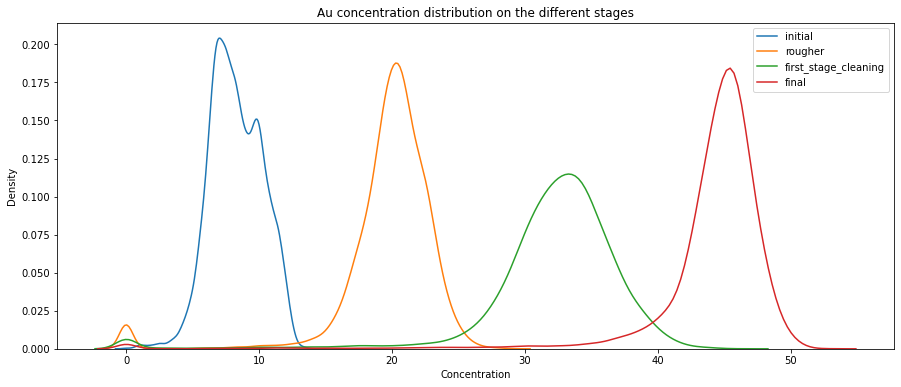

In [66]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['rougher.input.feed_au'], label='initial')
sns.kdeplot(df['rougher.output.concentrate_au'], label='rougher')
sns.kdeplot(df['primary_cleaner.output.concentrate_au'], label='first_stage_cleaning')
sns.kdeplot(df['final.output.concentrate_au'], label='final')
plt.xlabel('Concentration')
plt.title('Au concentration distribution on the different stages')
plt.legend()
plt.show()

По полученным распределениями отчетливо видно, что концентрация золота увеличивается на каждом этапе (флотация, первичная и вторичная очистка).

Посмотрим на изменение концентрации серебра на каждом этапе.

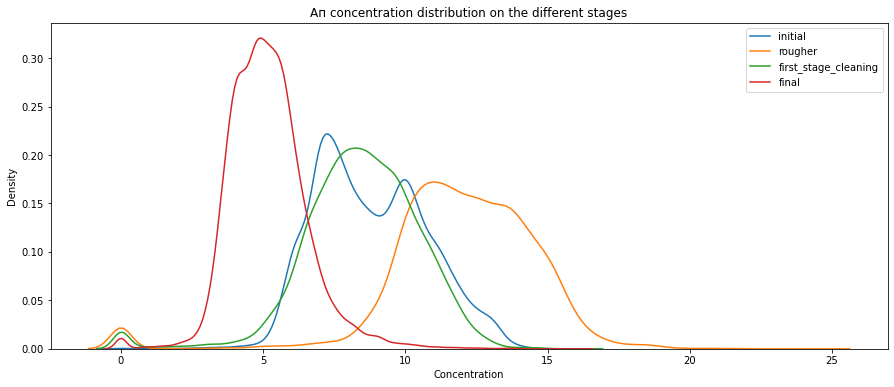

In [67]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['rougher.input.feed_ag'], label='initial')
sns.kdeplot(df['rougher.output.concentrate_ag'], label='rougher')
sns.kdeplot(df['primary_cleaner.output.concentrate_ag'], label='first_stage_cleaning')
sns.kdeplot(df['final.output.concentrate_ag'], label='final')
plt.xlabel('Concentration')
plt.title('Aп concentration distribution on the different stages')
plt.legend()
plt.show()

По полученным распределениям можно сделать вывод, что на стадии флотации концентрация серебра в смеси значительно увеличивается. На стадиях же первичной и вторичной очистки серебро удаляется из концентрата. Финальная концентрация серебра ниже изначальной.

Посмотрим как изменяется концентрация свинца на различных этапах.

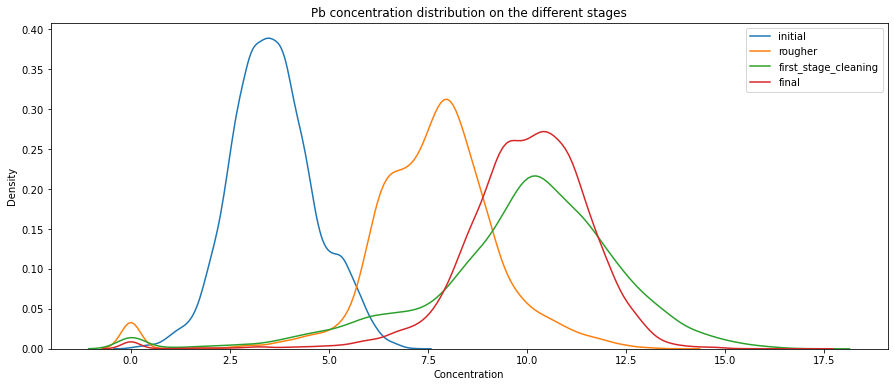

In [68]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['rougher.input.feed_pb'], label='initial')
sns.kdeplot(df['rougher.output.concentrate_pb'], label='rougher')
sns.kdeplot(df['primary_cleaner.output.concentrate_pb'], label='first_stage_cleaning')
sns.kdeplot(df['final.output.concentrate_pb'], label='final')
plt.xlabel('Concentration')
plt.title('Pb concentration distribution on the different stages')
plt.legend()
plt.show()

Концентрация свинца в смеси увеличивается на стадии флотации и на стадии первичной очистки. На стадии вторичной очистки концентрация свинца меняется несильно.

**Вывод:**
1. Концентрация золота в смеси увеличивается на каждом этапе очистки.
2. Концентрация серебра увеличивается на этапе флотации, но затем на стадиях очистки его концентрация снижается. Финальная концентрация ниже исходной.
3. Концентрация свинца увеличивается на всех стадиях кроме стадии вторичной очистки.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

In [69]:
sample_train = df_train['rougher.input.feed_size']
sample_test = df_test['rougher.input.feed_size']

Взглянем на распределение размеров гранул сырья на обучающей и тестовой выборках.

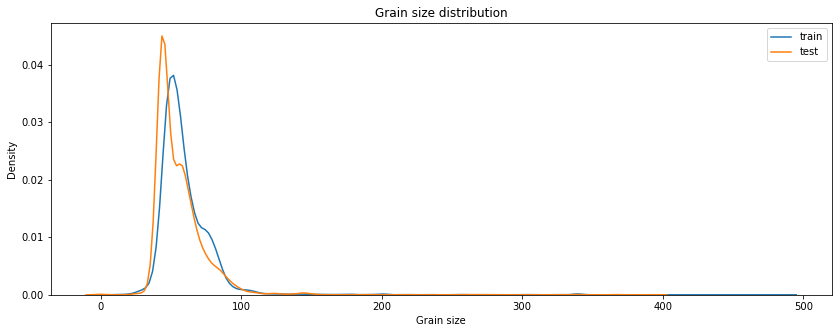

In [70]:
plt.figure(figsize=(14,5))
sns.kdeplot(sample_train, label='train')
sns.kdeplot(sample_test, label='test')
plt.xlabel('Grain size')
plt.title('Grain size distribution')
plt.legend()
plt.show()

Оба распределения имеют нормальный вид, однако оба скошены вправо. Взглянем на среднее и стандартное отклонение распределений.

In [71]:
pd.concat([sample_train.describe(), sample_test.describe()], axis=1)

,rougher.input.feed_size,rougher.input.feed_size
count,14005.000000,5289.000000
mean,60.110518,55.951097
std,22.418485,19.081758
min,9.659576,0.046369
25%,48.973027,43.906347
50%,55.373885,50.841029
75%,66.080172,62.431047
max,484.967466,392.494040


**Вывод**:
1. Средние и стандартные отклонения распределений отличаются несильно. 
2. Размеры большинства частиц лежат в оптимальном интервале  40—100 мкм  («Флотация руды»: ООО "Техноаналитприбор".URL:https://techade.ru/stati/flotatsiya-rudy) для обоих выборок. 
3. Может сделать вывод, что распределения размеров гранул в обучающей и тестовой выборках похожи.

### Суммарная концентрация всех веществ

Посмотрим на распределение суммарной концентрации веществ на разных стадиях: в сырье, в черновом и финальном концентрате.

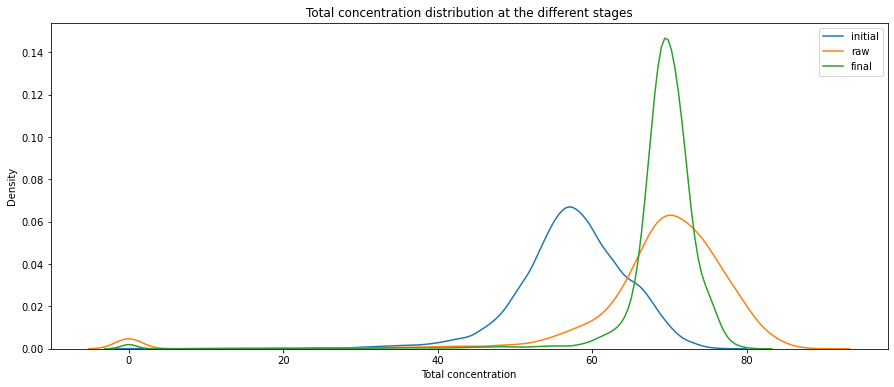

In [72]:
plt.figure(figsize=(15,6))
sns.kdeplot((df['rougher.input.feed_ag'] + 
 df['rougher.input.feed_pb'] + 
 df['rougher.input.feed_sol'] + 
 df['rougher.input.feed_au']), label='initial')
sns.kdeplot((df['rougher.output.concentrate_ag'] + 
 df['rougher.output.concentrate_pb'] + 
 df['rougher.output.concentrate_sol'] + 
 df['rougher.output.concentrate_au']), label='raw')
sns.kdeplot((df['final.output.concentrate_ag'] + 
 df['final.output.concentrate_pb'] + 
 df['final.output.concentrate_sol'] + 
 df['final.output.concentrate_au']), label='final')
plt.legend()
plt.xlabel('Total concentration')
plt.title('Total concentration distribution at the different stages')
plt.show()

На графике отчетливо виден выброс на уровне нуля. Так как суммарная концентрация веществ не может быть равна нуля, данные значения считаем ошибкой, и все строки, соответствующие данному условию, должны быть удалены. 

Посмотрим, сколько всего строк, где в сырье суммарная концентрация всех веществ равна нулю

In [73]:
len(df[(df['rougher.input.feed_ag'] + 
 df['rougher.input.feed_pb'] + 
 df['rougher.input.feed_sol'] + 
 df['rougher.input.feed_au'] == 0)])

0

На данном этапе никаких ошибок нет, все в порядке.

В пункте 1.3 мы выяснили, что в тестовой выборке нет данных о выходных концентрациях веществ после флотации и очистки, следовательно дальнейшие рассуждения проводим лишь для обучающей выборки.

Посмотрим, сколько строк с нулевой суммарной концентрацией веществ в черновом концентрате.

In [74]:
len(df_train[(df_train['rougher.output.concentrate_ag'] + 
 df_train['rougher.output.concentrate_pb'] + 
 df_train['rougher.output.concentrate_sol'] + 
 df_train['rougher.output.concentrate_au'] == 0)])

297

Посмотрим, сколько строк с нулевой суммарной концентрацией веществ в финальном концентрате.

In [75]:
len(df_train[(df_train['final.output.concentrate_ag'] + 
 df_train['final.output.concentrate_pb'] + 
 df_train['final.output.concentrate_sol'] + 
 df_train['final.output.concentrate_au'] == 0)])

58

Удалим данные строки из обучающей выборки. Возьмем индексы строк, которые должны быть удалены.

In [76]:
indexes_to_remove = df_train[(df_train['rougher.output.concentrate_ag'] + 
                              df_train['rougher.output.concentrate_pb'] + 
                              df_train['rougher.output.concentrate_sol'] + 
                              df_train['rougher.output.concentrate_au'] == 0) | 
                             (df_train['final.output.concentrate_ag'] + 
                              df_train['final.output.concentrate_pb'] + 
                              df_train['final.output.concentrate_sol'] + 
                              df_train['final.output.concentrate_au'] == 0)].index

In [77]:
len(indexes_to_remove)

354

Сохраним изначальный размер обучающей выборки для дальнейшего контроля.

In [78]:
features_shape_initial = features_train.shape
target_shape_initial = target_train.shape

Удаляем строки

In [79]:
features_train = features_train.drop(indexes_to_remove).reset_index(drop=True)

In [80]:
target_train = target_train.drop(indexes_to_remove).reset_index(drop=True)

Сравниваем размер обучающей выборки до и после.

In [81]:
print(features_shape_initial)
print(features_train.shape)
features_shape_initial[0] - features_train.shape[0]

(14149, 52)
(13795, 52)


354

In [82]:
print(target_shape_initial)
print(target_train.shape)
target_shape_initial[0] - target_train.shape[0]

(14149, 2)
(13795, 2)


354

Удаление строк произведено успешно.

**Вывод:**
1. Сырье имеет самую низкую суммарную концентрацию веществ. Это объясняется тем, что на этапе флотации в установку подается смесь золотосодержащей руды.
2. Черновой и финальной концентрат имеют похожую среднюю суммарную концентрацию веществ, однако распределение для чернового концентрата куда более широкое, что говорит о большом разбросе. Распределение же для финального концентрата довольно узкое, разброс небольшой.
3. Была обнаружена аномалия, когда суммарная концентрация веществ равняется нулю. Такого физически не может быть, поэтому данные строки были удалены из обучающей выборки.

## Модель

### Определение метрики качества

Для решения задачи будем использовать sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Зададим его с помощью функции.

In [83]:
def sMAPE(true, predictions):
    '''
    Данная функция вычисляет симметричное среднее абсолютное процентное отклонение по предсказаниям и истинным ответам.
    '''
    error = []
    for i in range(len(true)):
        error.append(abs(true[i] - predictions[i]) / ((abs(true[i]) + abs(predictions[i])) / 2))
    return pd.Series(error).mean()

В данной работе будем предсказывать сразу 2 величины - эффективность обогащения после флотации (rougher.output.recovery) и финальную эффективность обогащения (final.output.recovery). Итоговая метрика будет складываться из двух величин. Напишем функцию для нее.

In [84]:
def final_sMAPE(smape_rougher, smape_final):
    '''
    Данная функция является итоговой метрикой качества.
    Она учитывает эффективность обогащения после флотации и финальную эффективность обогащения.
    '''
    return smape_rougher * 0.25 + smape_final * 0.75

### Важность признаков

В нашей выборке на данный момент имеется 52 признака. Это довольно большое число, с которым неудобно работать. Плюс некоторые признаки могут не оказывать никакого влияния на результат, то есть быть просто мусором для модели. Попробуем снизить их число (если это повысит эффективность модели). Будем придерживаться следующего плана:
1. Строим модель случайного леса на обучающей выборке.
2. С помощью специального атрибута определяем важность признаков.
3. Оцениваем качество модели с помощью *cross_val_predict* и нашей метрики sMAPE. Запоминаем значение.
4. Создаем копию обучающей выборки, в которой оставляем лишь признаки, важность превышает некоторое значение.
5. Обучаем и оцениваем модель на усеченной обучающей выборке, сравниваем значение метрики со значением, полученным раннее.
6. В зависимости от получившихся значений метрики принимаем решении об удалении или неудалении признаков.

Обучаем модель случайного леса.

In [85]:
forest = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
forest.fit(features_train, target_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

Посмотрим на важность каждого признака.

In [86]:
features = pd.concat([pd.Series(features_train.columns), 
                      pd.Series(forest.feature_importances_)], axis=1).sort_values(by=1, ascending=False).reset_index(drop=True)
features.columns = ['feature', 'importance']
features

,feature,importance
0,rougher.input.feed_ag,0.214406
1,primary_cleaner.input.sulfate,0.093915
2,secondary_cleaner.state.floatbank4_a_air,0.075733
3,rougher.input.feed_au,0.055467
4,rougher.state.floatbank10_d_air,0.032735
5,secondary_cleaner.state.floatbank5_b_air,0.030762
6,secondary_cleaner.state.floatbank2_a_air,0.028590
7,secondary_cleaner.state.floatbank4_b_air,0.027897
8,rougher.input.floatbank10_xanthate,0.027653
9,rougher.state.floatbank10_a_level,0.025426


Переходим к оценке качества.

In [87]:
predictions = cross_val_predict(RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42), 
                                features_train, 
                                target_train, 
                                cv=5,
                                n_jobs=-1)

Для удобства сохраним целевые признаки в двух разных переменных.

In [88]:
rougher_recovery_true = target_train['rougher.output.recovery']
final_recovery_true = target_train['final.output.recovery']

Тоже самое сделаем и для предсказанных значений.

In [89]:
rougher_recovery_pred = predictions[:, 0]
final_recovery_pred = predictions[:, 1]

Оценим итоговую метрику.

In [90]:
final_sMAPE(sMAPE(rougher_recovery_true, rougher_recovery_pred), sMAPE(final_recovery_true, final_recovery_pred))

0.0919549921366963

Теперь рассмотрим случай с меньшим количеством признаков. Оставим лишь признаки, важность которых превышает 0.015.

In [109]:
features_important = features.query('importance > 0.015')
important_cols = list(features_important['feature'])

Создадим копию обучающей выборки, в которой оставим лишь важные признаки.

In [110]:
features_train_truncated = features_train.copy()

for col in features_train_truncated.columns:
    if col not in important_cols:
        features_train_truncated = features_train_truncated.drop(col, axis=1)

In [111]:
features_train_truncated.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_level,rougher.state.floatbank10_d_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_b_air
0,-0.153001,0.377210,-0.117761,-1.307243,-1.110353,-0.204069,0.109053,-0.719183,0.140197,0.184812,-0.368314,1.846756,-0.660363,-1.054168,-0.644528,-0.864660
1,-0.189879,0.427043,-0.117761,-1.275213,-1.127567,-0.123780,-0.101398,-0.723125,0.138187,0.189564,-0.325718,1.854314,-0.655640,-1.058507,-0.672956,-0.881122
2,-0.235496,0.729688,-0.117761,-1.298765,-1.224596,-0.113387,-0.057871,-0.783747,0.311317,0.324232,-0.325812,1.851091,-0.634165,-1.054490,-0.680139,-0.876071
3,-0.274564,0.731426,-0.117761,-1.337339,-1.335671,-0.100749,0.119753,-0.910885,0.316558,0.318583,-0.327155,1.840996,-0.644968,-1.050691,-0.663629,-0.882412
4,-0.382518,0.906918,-0.117761,-1.328054,-1.564478,-0.178953,-0.381755,-1.147664,0.312627,0.317405,-0.322392,1.850661,-0.630800,-1.052319,-0.672473,-0.896822


Обучим и оценим модель, используя новую обучающую выборку.

In [112]:
predictions_less_features = cross_val_predict(RandomForestRegressor(max_depth=10, n_estimators=200), 
                                              features_train_truncated, 
                                              target_train, 
                                              cv=5,
                                              n_jobs=-1)

In [113]:
rougher_recovery_pred_truncated = predictions_less_features[:, 0]
final_recovery_pred_truncated = predictions_less_features[:, 1]

In [114]:
final_sMAPE(sMAPE(rougher_recovery_true, rougher_recovery_pred_truncated), 
            sMAPE(final_recovery_true, final_recovery_pred_truncated))

0.08550943038181782

В данном случае значение метрики ниже, а значит данная модель лучше. В таком случае принимаем решение об удалении столбцов с низкой важностью из обучающей и тестовой выборок.

In [115]:
features_test_truncated = features_test.copy()

for col in features_test_truncated.columns:
    if col not in important_cols:
        features_test_truncated = features_test_truncated.drop(col, axis=1)

In [116]:
features_test_truncated.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_level,rougher.state.floatbank10_d_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_b_air
0,1.957387,1.820614,1.233941,2.399184,1.945924,0.119576,1.148905,2.197271,0.271654,0.286418,0.203982,-0.057253,-0.817912,-1.406404,-1.421512,-1.420954
1,2.073144,1.818939,1.233941,2.350513,1.845035,0.086006,0.982464,2.111243,0.132113,0.182355,0.202658,-0.046709,-0.820449,-1.400292,-1.399758,-1.419855
2,2.069804,1.195111,0.756231,2.404374,1.754303,0.307448,1.253382,2.201037,-0.001984,0.078064,0.209493,-0.050209,-0.822986,-1.417216,-1.406244,-1.415297
3,2.071727,0.934568,0.517376,2.015228,1.469991,-0.007865,0.956994,2.248064,-0.045984,0.043046,0.205352,-0.051974,-0.825524,-1.404718,-1.410420,-1.410740
4,1.662378,0.541653,0.338235,1.449323,1.153244,0.146676,0.998670,1.783776,-0.103679,-0.001850,0.201202,0.182318,-0.826745,-1.406083,-1.414277,-1.406182


Посмотрим на признаки, которые у нас остались - визуализируем важность с помощью столбчатой диаграммы.

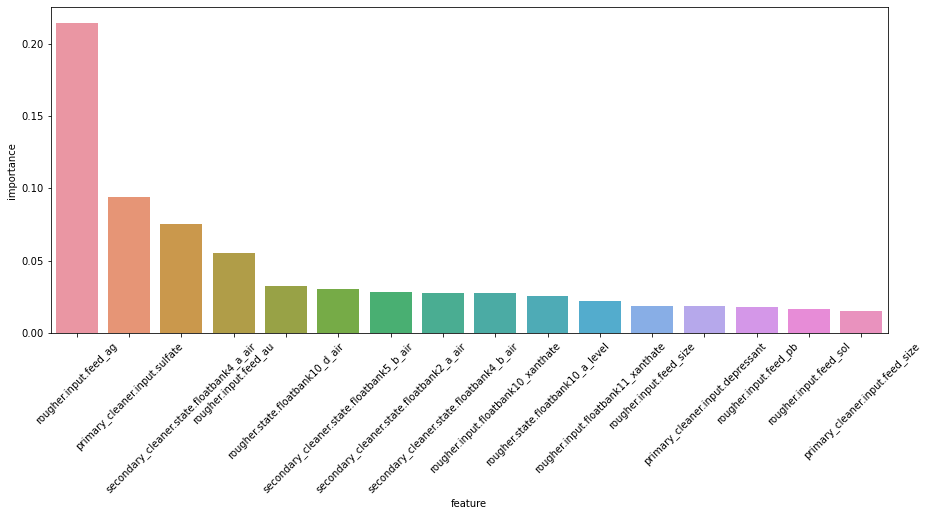

In [117]:
plt.figure(figsize=(15,6))
sns.barplot(x=features_important['feature'], y=features_important['importance'])
plt.xticks(rotation=45)
plt.show()

### Обучение моделей

Обучим разные модели, откалибруем их гиперпараметры и сравним их качество с помощью кросс-валидации.

#### Линейная регрессия

Начнем с линейной регрессии. У модели нет гиперпараметров для настройки, следовательно сразу переходим к кросс-валидации.

Чтобы оценивать модели с помощью нашей метрики (final_sMAPE) будем использовать *cross_val_predict*, а не традиционный *cross_val_score*.

In [118]:
pred_lin_reg = cross_val_predict(LinearRegression(),
                                features_train_truncated,
                                target_train,
                                cv=5)

Сохраним предсказанные целевые признаки в двух переменных.

In [119]:
rougher_recovery_pred_lin_reg = pred_lin_reg[:, 0]
final_recovery_pred_lin_reg = pred_lin_reg[:, 1]

Рассчитаем метрику.

In [120]:
final_sMAPE_lr_cv = final_sMAPE(sMAPE(rougher_recovery_true, rougher_recovery_pred_lin_reg), 
            sMAPE(final_recovery_true, final_recovery_pred_lin_reg))

In [121]:
final_sMAPE_lr_cv

0.09037290172481963

#### Метод К-ближайших соседей

Выполним регрессию с помощью метода К-ближайших соседей. Для начала с помощью техники Grid Search определим оптимальное количество соседей.

In [122]:
parameters = [{'n_neighbors' : [5, 10, 50, 100, 200, 300, 400, 500]}]
grid_search = GridSearchCV(estimator=KNeighborsRegressor(),
                           param_grid=parameters,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(features_train_truncated, target_train)
best_parameters_knn = grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [123]:
best_parameters_knn

{'n_neighbors': 500}

Получили, что оптимальное число соседей - 500. Создадим модель и проверим её качество на кросс-валидации.

In [124]:
pred_knn = cross_val_predict(KNeighborsRegressor(n_neighbors=500),
                                features_train_truncated,
                                target_train,
                                cv=5)

Сохраним предсказания в 2 переменные.

In [125]:
rougher_recovery_pred_knn = pred_knn[:, 0]
final_recovery_pred_knn = pred_knn[:, 1]

Вычисляем итоговую метрику.

In [126]:
final_sMAPE_knn_cv = final_sMAPE(sMAPE(rougher_recovery_true, rougher_recovery_pred_knn), 
            sMAPE(final_recovery_true, final_recovery_pred_knn))

In [127]:
final_sMAPE_knn_cv

0.08349576222115693

#### Случайный лес

С помощью техники Grid Search определим оптимальные глубину дерева, количество деревьев, количество объектов и рассматриваемых признаков для разбиения узла.

In [128]:
parameters = [{'n_estimators' : [200, 225, 250],                                  
               'max_depth' : [5, 6, 7],                                          
               'min_samples_split' : [3, 4, 5],                                   
               'max_features' : [4, 6]}]                                          
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=parameters,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search_rf.fit(features_train_truncated, target_train)
best_parameters_rf = grid_search_rf.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [129]:
best_parameters_rf

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 3,
 'n_estimators': 200}

Оптимальные гиперпараметры для модели случайного леса: максимальная глубина дерева - 7, максимальное количество рассматриваемых признаков для разбиения - 4, минимальное количество объектов для разбиения - 3, количество деревьев - 200. Проведем кросс-валидацию, используя модель с определенными выше параметрами.

In [131]:
pred_rf = cross_val_predict(RandomForestRegressor(n_estimators=200,
                                                  max_depth=7,
                                                  max_features=4,
                                                  min_samples_split=3,
                                                  random_state=42),
                                features_train_truncated,
                                target_train,
                                cv=5,
                                n_jobs=-1)

Сохраним предсказания в 2 переменные.

In [132]:
rougher_recovery_pred_rf = pred_rf[:, 0]
final_recovery_pred_rf = pred_rf[:, 1]

Подсчитаем итоговую метрику.

In [133]:
final_sMAPE_rf_cv = final_sMAPE(sMAPE(rougher_recovery_true, rougher_recovery_pred_rf), 
            sMAPE(final_recovery_true, final_recovery_pred_rf))

In [134]:
final_sMAPE_rf_cv

0.08046112726584859

#### Сравнение моделей

Сравним модели с помощью нашей метрики.

In [135]:
results_cv = pd.DataFrame([['linear regression', final_sMAPE_lr_cv],
                           ['KNN regression', final_sMAPE_knn_cv],
                           ['random forest', final_sMAPE_rf_cv]], columns=['model', 'final sMAPE'])
results_cv

,model,final sMAPE
0,linear regression,0.090373
1,KNN regression,0.083496
2,random forest,0.080461


Лучше всех себя показала модель случайного леса. Обучим ее на всей обучающей выборке для дальнейшей проверке на тесте.

In [136]:
model = RandomForestRegressor(n_estimators=200, max_depth=7, max_features=4, min_samples_split=3, random_state=42)
model.fit(features_train_truncated, target_train)

RandomForestRegressor(max_depth=7, max_features=4, min_samples_split=3,
                      n_estimators=200, random_state=42)

#### Вывод

1. Три модели (линейная регрессия, метод К-ближайших соседей и случайный лес) были обучени. Их качество было оценено с помощью кросс-валидации.
2. Наилучая модель - случайный лес со значением итоговой метрики (final sMAPE) 0.08.

### Проверка на тестовой выборке

Для начала сохраним целевые признаки из тестового набора в две разные переменные.

In [137]:
rougher_recovery_test_true = target_test['rougher.output.recovery']
final_recovery_test_true = target_test['final.output.recovery']

Сделаем предсказания.

In [138]:
pred_test = model.predict(features_test_truncated)

Сохраним предсказания в две переменные.

In [139]:
rougher_recovery_test_pred = pred_test[:, 0]
final_recovery_test_pred = pred_test[:, 1]

Вычислим итоговую метрику.

In [140]:
final_sMAPE_test = final_sMAPE(sMAPE(rougher_recovery_test_true, rougher_recovery_test_pred), 
            sMAPE(final_recovery_test_true, final_recovery_test_pred))

In [141]:
final_sMAPE_test

0.08562015242789181

Значение итоговой метрики незначительно хуже, чем полученное на кросс-валидации, можем считать, что тест пройден успешно.

### Проверка модели на адекватность

Сравним нашу модель с моделью, которая всегда предсказывает одно и тоже значение.

Начнем с модели, которая всегда предсказывает среднее значение.

In [142]:
dummy_regк_mean = DummyRegressor(strategy="mean")
dummy_regк_mean.fit(features_train_truncated, target_train)
pred_test_mean = dummy_regк_mean.predict(features_test_truncated)

Как и раньше сохраняем предсказания в 2 переменные.

In [143]:
rougher_recovery_test_mean = pred_test_mean[:, 0]
final_recovery_test_mean = pred_test_mean[:, 1]

Вычисляем итоговую метрику.

In [144]:
final_sMAPE_test_mean = final_sMAPE(sMAPE(rougher_recovery_test_true, rougher_recovery_test_mean), 
            sMAPE(final_recovery_test_true, final_recovery_test_mean))

In [145]:
final_sMAPE_test_mean

0.09822793053885728

Значение метрики хуже, чем в нашей модели, следовательно наша модель эффективнее модели, которая всегда предсказывает среднее.

Проделаем тоже самое для модели, которая всегда предсказывает медиану.

In [146]:
dummy_regк_median = DummyRegressor(strategy="median")
dummy_regк_median.fit(features_train_truncated, target_train)
pred_test_median = dummy_regк_median.predict(features_test_truncated)

In [147]:
rougher_recovery_test_median = pred_test_median[:, 0]
final_recovery_test_median = pred_test_median[:, 1]

In [148]:
final_sMAPE_test_median = final_sMAPE(sMAPE(rougher_recovery_test_true, rougher_recovery_test_median), 
            sMAPE(final_recovery_test_true, final_recovery_test_median))

In [149]:
final_sMAPE_test_median

0.0943899456364262

И в данном случае наша модель ведет себя лучше константной.

## Вывод

1. На первом этапе данные были загружены и была проведена проверка корректности расчета эффективности обогащения. На стадии предобработки, пропуски в данных были заполнены с помощью итеративного импьютера, была выполнена стандартизация данных.
2. Был проведен исследовательский анализ данных (EDA), в результате которого было установлено, что:
    1. Концентрация золота в смеси увеличивается на каждом этапе очистки. Концентрация серебра увеличивается на этапе флотации, но затем на стадиях очистки его концентрация снижается.
    2. Распределения размеров гранул в обучающей и тестовой выборках похожи.
    3. Сырье имеет самую низкую суммарную концентрацию веществ. Это объясняется тем, что на этапе флотации в установку подается смесь золотосодержащей руды. Черновой и финальной концентраты имеют похожую среднюю суммарную концентрацию веществ, однако распределение для чернового концентрата куда более широкое.
3. В данной работе модели машинного обучения строились для предсказания двух величин: эффективность обогащения чернового концентрата и эффективность обогащения финального концентрата. Для оценки качества использовалась метрика sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
4. Три модели были построены (линейная регрессия, метод К-ближайших соседей и случайный лес). Лучше всех на кросс-валидации себя показал модель случайного леса со значением итоговой метрики 0.080. Она была выбрана для дальнейшего тестирования.
5. На тесте значение итоговой метрики составило 0.086. 
6. Модель была проверена на адекватность, путем сравнения ее производительности с производительностью константых моделей (предсказывающих определенное значение: в нашем случае медиана или среднее). В обоих случаях обученная модель случайного леса оказалась лучше.